In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'sklearn'

In [13]:
def extraer_bordes(imagen_path, umbral1=50, umbral2=150):
    # Leer la imagen en escala de grises
    imagen = cv2.imread(imagen_path, 0)
    
    # Verificar si la imagen se ha cargado correctamente
    if imagen is None:
        print(f"No se pudo abrir la imagen: {imagen_path}")
        return

    # Aplicar una operación de desenfoque para reducir el ruido
    imagen_desenfocada = cv2.GaussianBlur(imagen, (5,5), 0)
    
    # Utilizar el algoritmo de Canny para la detección de bordes
    bordes = cv2.Canny(imagen_desenfocada, umbral1, umbral2)
    
    # Establecer el tamaño de la figura
    plt.figure(figsize=(15, 10)) 

    # Mostrar la imagen original y la imagen con los bordes detectados
    plt.subplot(121), plt.imshow(imagen, cmap='gray')
    plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122), plt.imshow(bordes, cmap='gray')
    plt.title('Bordes Detectados'), plt.xticks([]), plt.yticks([])
    
    plt.show()


In [13]:
%pip install sklearn

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [ ]:
%pip install matplotlib

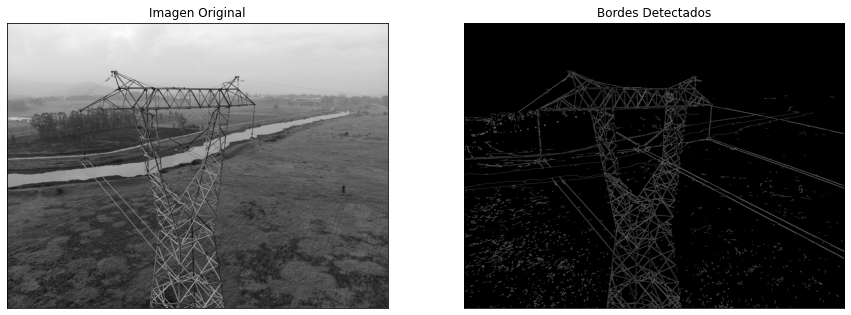

In [14]:
# Usar la función con la ruta de tu imagen
extraer_bordes('DJI_0194.JPG')

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def hough_transform(image_path):
    # Leer la imagen en escala de grises
    imagen = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Verificar si la imagen se ha cargado correctamente
    if imagen is None:
        print(f"No se pudo abrir la imagen: {image_path}")
        return
#---------TESTING----------------------------
    # Suavizar la imagen usando un filtro gaussiano
    imagen_suavizada = cv2.GaussianBlur(imagen, (9, 9), 2)
    
    # Detectar los bordes usando el detector de bordes de Canny con umbrales ajustados
    bordes = cv2.Canny(imagen_suavizada, 50, 200, apertureSize=3)
    
    # Aplicar la Transformada de Hough con parámetros ajustados
    lineas = cv2.HoughLinesP(bordes, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=20)
    
#---------------------------------------------
    
    # # Aplicar un umbral binario a la imagen
    # _, imagen_bin = cv2.threshold(imagen, 150, 255, cv2.THRESH_BINARY)
    
    # # Detectar los bordes usando el detector de bordes de Canny
    # bordes = cv2.Canny(imagen_bin, 50, 150, apertureSize=3)
    
    # # Aplicar la Transformada de Hough para encontrar líneas en la imagen
    # lineas = cv2.HoughLinesP(bordes, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=5)
    
    # Crear una copia de la imagen original para dibujar las líneas
    imagen_lineas = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
    
    # Dibujar las líneas en la imagen
    for linea in lineas:
        x1, y1, x2, y2 = linea[0]
        cv2.line(imagen_lineas, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Convertir la imagen original y la imagen con líneas a RGB para visualización con matplotlib
    imagen = cv2.cvtColor(imagen, cv2.COLOR_GRAY2RGB)
    imagen_lineas = cv2.cvtColor(imagen_lineas, cv2.COLOR_BGR2RGB)
    
    # Establecer el tamaño de la figura
    plt.figure(figsize=(15, 10))
    
    # Mostrar la imagen original y la imagen con líneas detectadas
    plt.subplot(1, 2, 1)
    plt.imshow(imagen)
    plt.title('Imagen Original')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(imagen_lineas)
    plt.title('Transformada de Hough')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

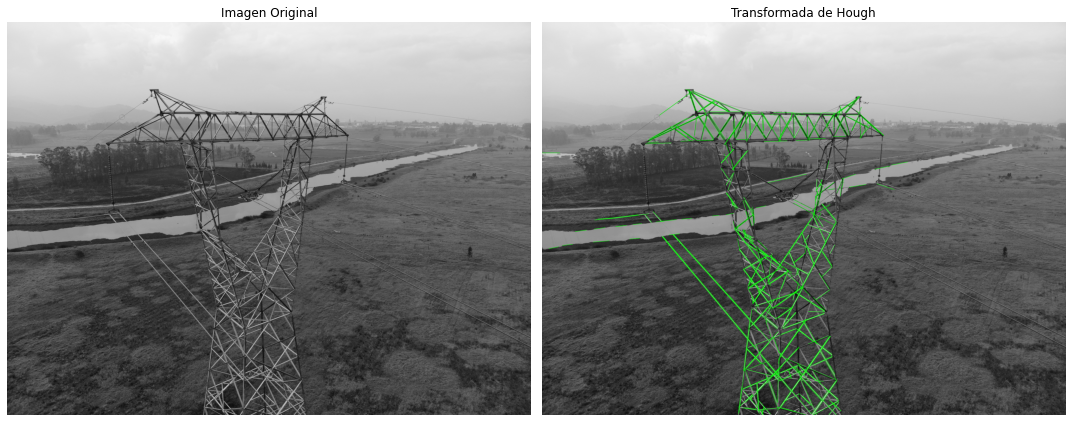

In [22]:
# Usar la función con la ruta de tu imagen
hough_transform('DJI_0194.JPG')

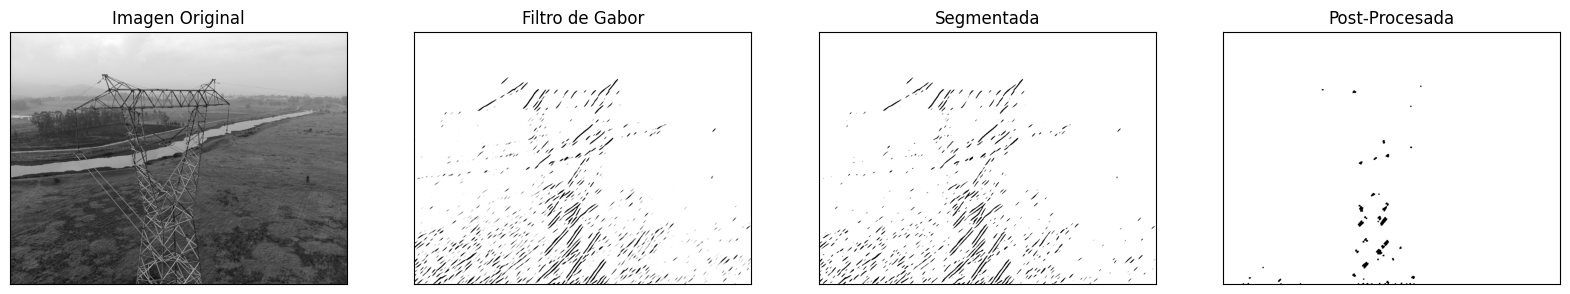

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gabor_filter(image, ksize=(31, 31), sigma=4.0, theta=np.pi/4, lambd=10.0, gamma=0.5):
    """
    Aplica un filtro de Gabor a la imagen para resaltar características onduladas.
    """
    kernel = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi=0, ktype=cv2.CV_32F)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)
    return filtered_image

def segment_image(image, lower_thresh=100, upper_thresh=255):
    """
    Segmenta la imagen usando umbrales.
    """
    _, segmented = cv2.threshold(image, lower_thresh, upper_thresh, cv2.THRESH_BINARY)
    return segmented

def post_process(segmented_image):
    """
    Aplica operaciones morfológicas para mejorar la segmentación.
    """
    kernel = np.ones((5, 5), np.uint8)
    cleaned = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, kernel)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)
    return cleaned

def process_image_gabor(image_path):
    # Leer la imagen en escala de grises
    imagen = cv2.imread(image_path, 0)
    
    # Verificar si la imagen se ha cargado correctamente
    if imagen is None:
        print(f"No se pudo abrir la imagen: {image_path}")
        return
    
    # Aplicar un filtro de Gabor
    gabor_filtered = apply_gabor_filter(imagen)
    
    # Segmentar la imagen
    segmented = segment_image(gabor_filtered)
    
    # Post-procesamiento
    cleaned = post_process(segmented)
    
    # Establecer el tamaño de la figura
    plt.figure(figsize=(20, 15))

    # Mostrar la imagen original, la imagen filtrada con Gabor, la imagen segmentada y la imagen post-procesada
    plt.subplot(141), plt.imshow(imagen, cmap='gray')
    plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(142), plt.imshow(gabor_filtered, cmap='gray')
    plt.title('Filtro de Gabor'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(143), plt.imshow(segmented, cmap='gray')
    plt.title('Segmentada'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(144), plt.imshow(cleaned, cmap='gray')
    plt.title('Post-Procesada'), plt.xticks([]), plt.yticks([])
    
    plt.show()

# Aplicar el proceso a la imagen
process_image_gabor('DJI_0194.JPG')

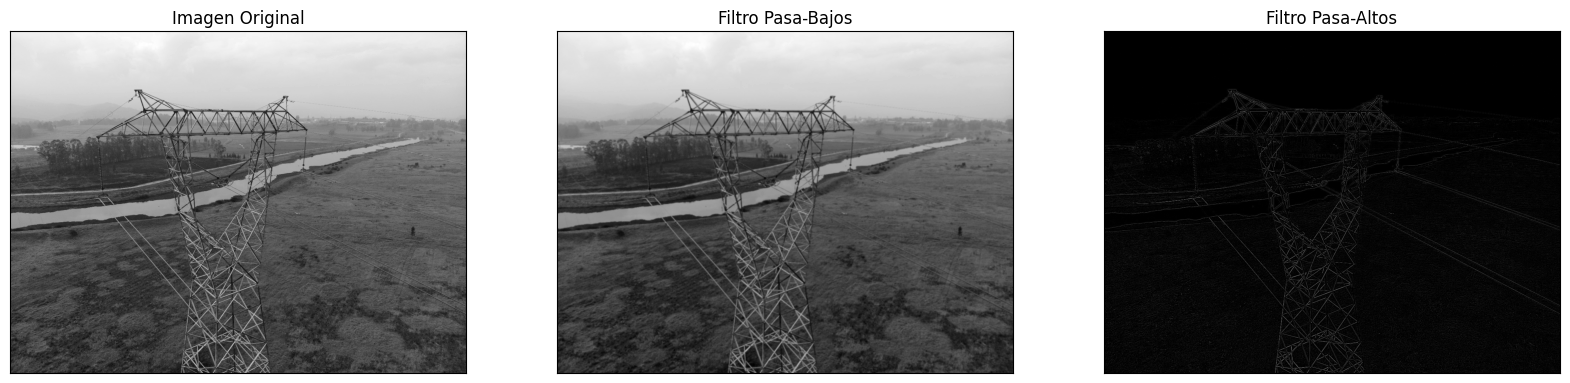

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def low_pass_filter(image, ksize=(5, 5)):
    """
    Aplica un filtro pasa-bajos a la imagen usando desenfoque gaussiano.
    """
    return cv2.GaussianBlur(image, ksize, 0)

def high_pass_filter(image):
    """
    Aplica un filtro pasa-altos restando la imagen desenfocada de la original.
    """
    low_passed = low_pass_filter(image)
    return cv2.subtract(image, low_passed)

def process_image_with_filters(image_path):
    # Leer la imagen en escala de grises
    imagen = cv2.imread(image_path, 0)
    
    # Verificar si la imagen se ha cargado correctamente
    if imagen is None:
        print(f"No se pudo abrir la imagen: {image_path}")
        return
    
    # Aplicar filtro pasa-bajos
    low_passed_image = low_pass_filter(imagen)
    
    # Aplicar filtro pasa-altos
    high_passed_image = high_pass_filter(imagen)
    
    # Establecer el tamaño de la figura
    plt.figure(figsize=(20, 15))

    # Mostrar la imagen original, la imagen con filtro pasa-bajos y la imagen con filtro pasa-altos
    plt.subplot(131), plt.imshow(imagen, cmap='gray')
    plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(132), plt.imshow(low_passed_image, cmap='gray')
    plt.title('Filtro Pasa-Bajos'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(133), plt.imshow(high_passed_image, cmap='gray')
    plt.title('Filtro Pasa-Altos'), plt.xticks([]), plt.yticks([])
    
    plt.show()
    
# Aplicar el proceso a la imagen
process_image_with_filters('DJI_0194.JPG')


/Users/carlosalbertotalerojacome/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


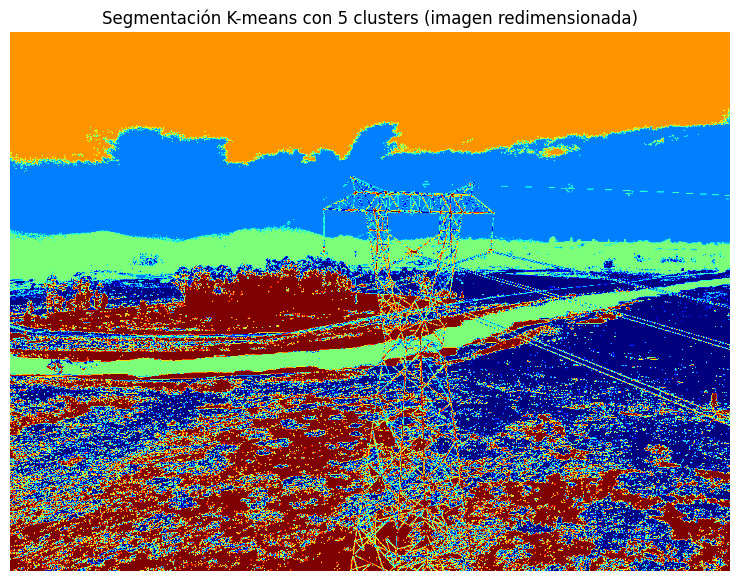

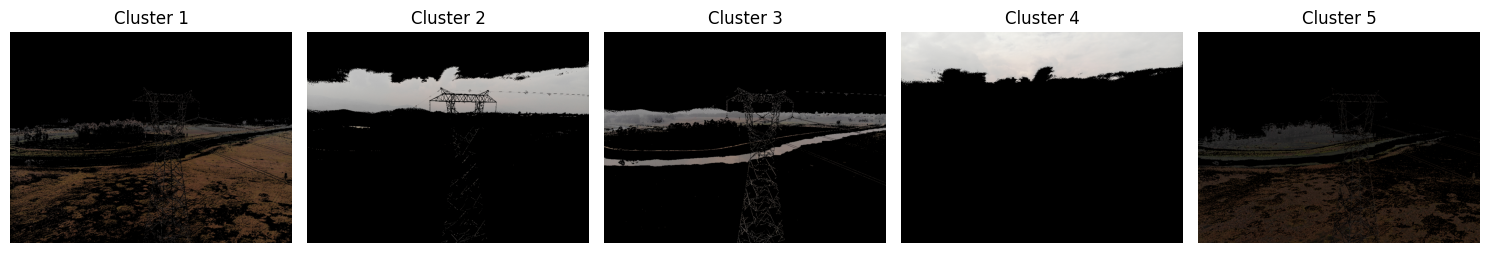

In [13]:
# Extended K-means clustering code with visualization of each cluster

# Required libraries
import cv2
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "../data/DJI_0191.JPG"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image for processing
scale_factor = 0.25
image_resized = cv2.resize(image_rgb, (int(image_rgb.shape[1] * scale_factor), int(image_rgb.shape[0] * scale_factor)))

# Reshape the resized image to be a list of pixels
pixels_resized = image_resized.reshape(-1, 3)

# Apply K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pixels_resized)
pixel_labels_resized = kmeans.predict(pixels_resized)

# Reshape the labels to the original resized image shape
segmented_image_resized = pixel_labels_resized.reshape(image_resized.shape[:2])

# Display the segmented image with different clusters
plt.figure(figsize=(10, 7))
plt.imshow(segmented_image_resized, cmap='jet')
plt.axis('off')
plt.title(f"Segmentación K-means con {n_clusters} clusters (imagen redimensionada)")
plt.show()

# Display each cluster separately to analyze
fig, axs = plt.subplots(1, n_clusters, figsize=(15, 5))

for i in range(n_clusters):
    mask = segmented_image_resized == i
    cluster_image = np.zeros_like(image_resized)
    cluster_image[mask] = image_resized[mask]
    
    axs[i].imshow(cluster_image)
    axs[i].axis('off')
    axs[i].set_title(f"Cluster {i+1}")

plt.tight_layout()
plt.show()


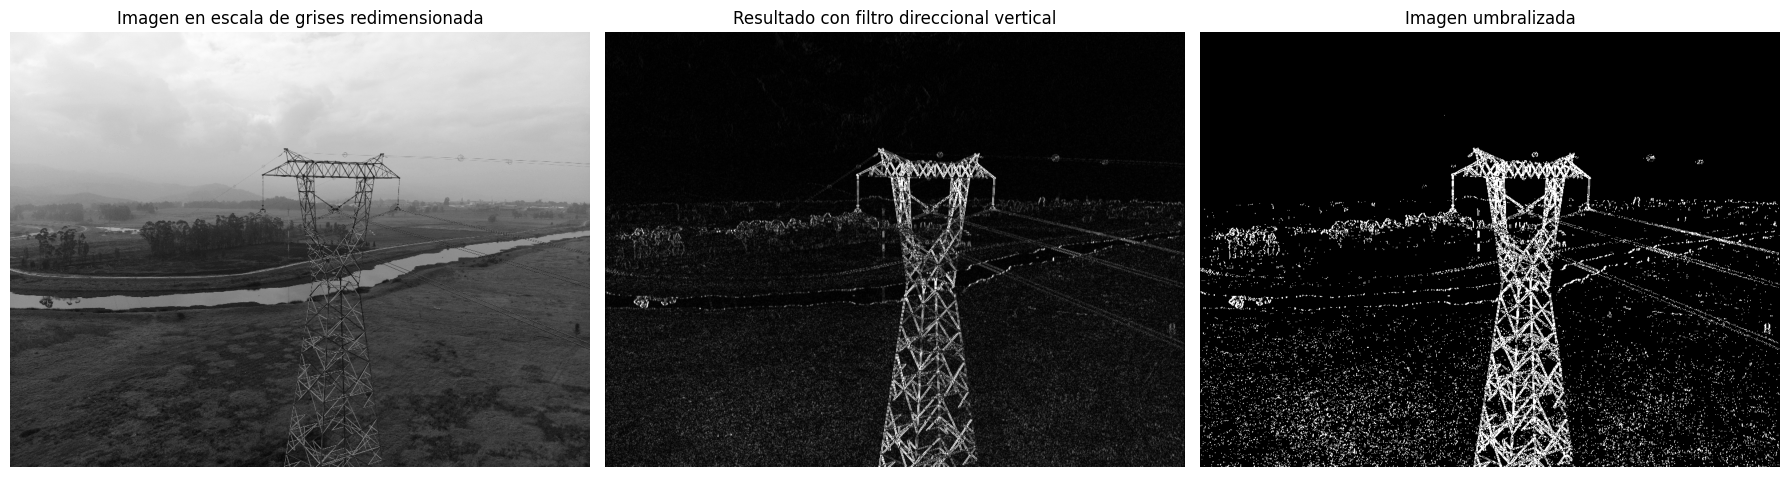

In [6]:
# Directional filtering with visualization of the results

# Required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "../data/DJI_0191.JPG"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image for processing
scale_factor = 0.25
image_resized = cv2.resize(image_rgb, (int(image_rgb.shape[1] * scale_factor), int(image_rgb.shape[0] * scale_factor)))

# Convert the resized image to grayscale
gray_resized = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)

# Apply vertical Sobel filter
sobel_vertical = cv2.Sobel(gray_resized, cv2.CV_64F, 1, 0, ksize=3)
sobel_vertical_abs = cv2.convertScaleAbs(sobel_vertical)

# Threshold the filtered image to get a binary mask
_, thresholded = cv2.threshold(sobel_vertical_abs, 50, 255, cv2.THRESH_BINARY)

# Display the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(gray_resized, cmap='gray')
axs[0].axis('off')
axs[0].set_title("Imagen en escala de grises redimensionada")

axs[1].imshow(sobel_vertical_abs, cmap='gray')
axs[1].axis('off')
axs[1].set_title("Resultado con filtro direccional vertical")

axs[2].imshow(thresholded, cmap='gray')
axs[2].axis('off')
axs[2].set_title("Imagen umbralizada")

plt.tight_layout()
plt.show()


Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a con

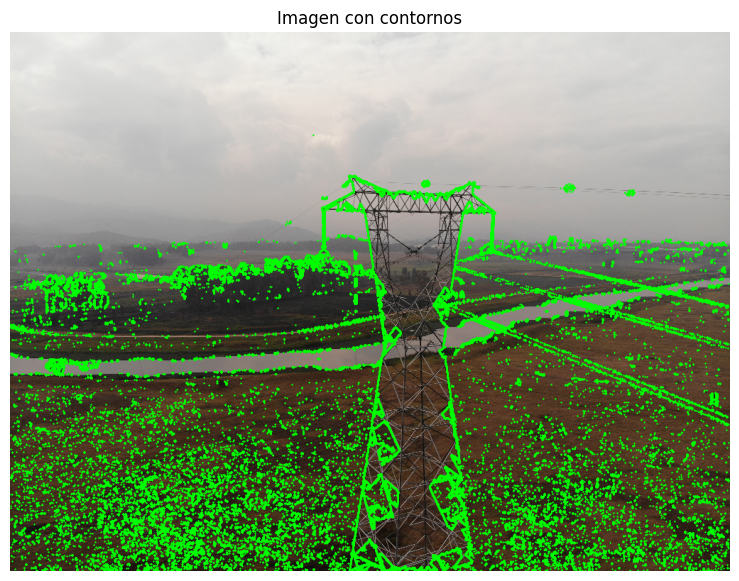

In [7]:
# Hu Moments calculation and visualization

# Required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "../data/DJI_0191.JPG"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image for processing
scale_factor = 0.25
image_resized = cv2.resize(image_rgb, (int(image_rgb.shape[1] * scale_factor), int(image_rgb.shape[0] * scale_factor)))

# Convert the resized image to grayscale
gray_resized = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)

# Apply vertical Sobel filter
sobel_vertical = cv2.Sobel(gray_resized, cv2.CV_64F, 1, 0, ksize=3)
sobel_vertical_abs = cv2.convertScaleAbs(sobel_vertical)

# Threshold the filtered image to get a binary mask
_, thresholded = cv2.threshold(sobel_vertical_abs, 50, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate Hu Moments for each contour and visualize
image_with_contours = image_resized.copy()
for contour in contours:
    # Draw the contour
    cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 2)
    
    # Calculate Hu Moments
    moments = cv2.moments(contour)
    hu_moments = cv2.HuMoments(moments)
    
    # Print the Hu Moments for the contour (you can also save them for further processing)
    print("Hu Moments for a contour:", hu_moments.flatten())

# Display the image with contours
plt.figure(figsize=(10, 7))
plt.imshow(image_with_contours)
plt.axis('off')
plt.title("Imagen con contornos")
plt.show()


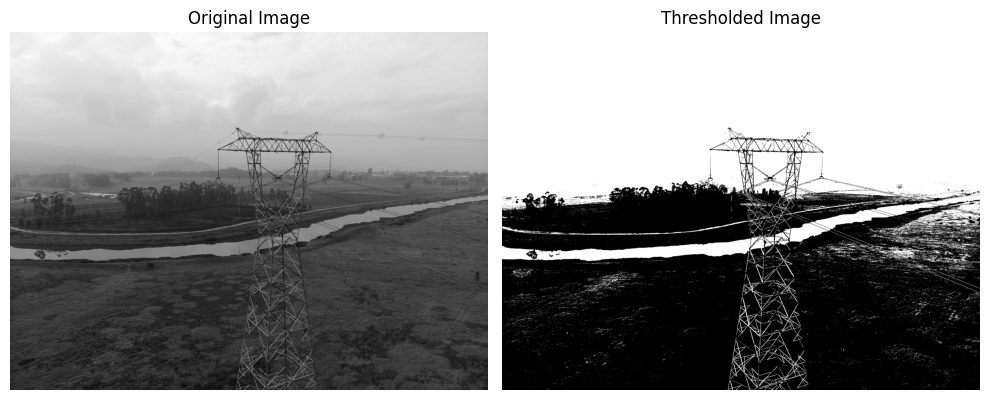

In [17]:
# Histogram-based segmentation
# Required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "../data/DJI_0191.JPG"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale

# Calculate the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# You might need to adjust this threshold based on your observation of the histogram
threshold_value = 75
_, thresholded = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')

plt.tight_layout()
plt.show()


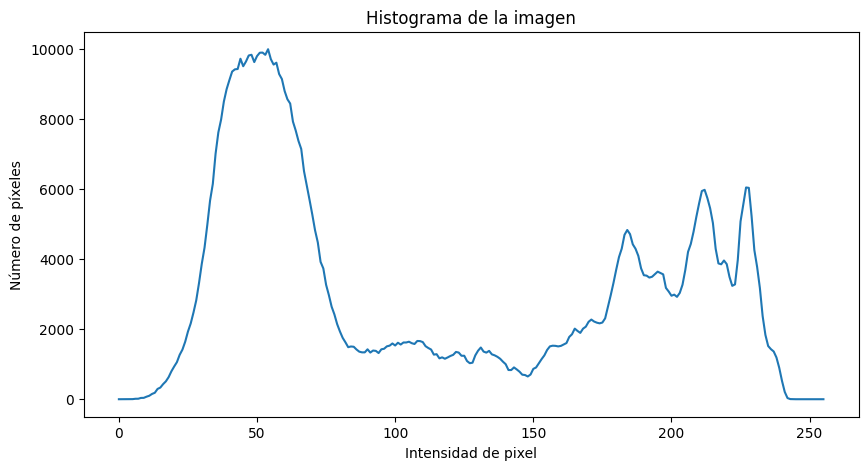

Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a con

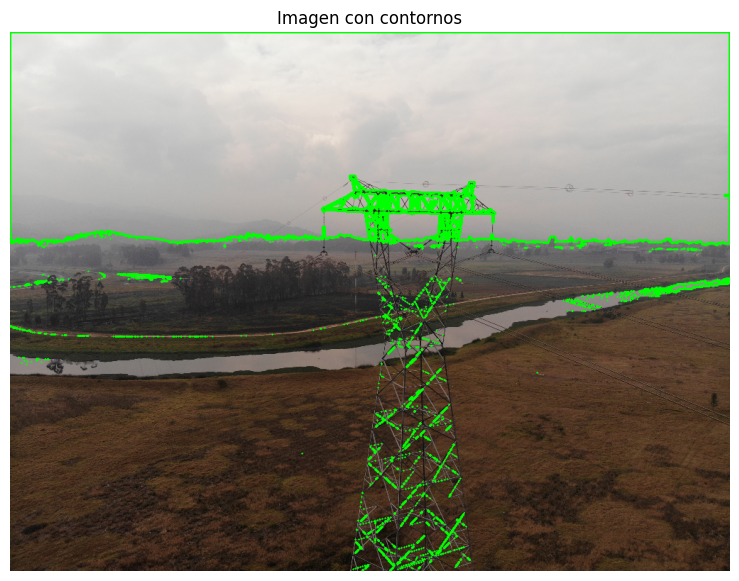

In [8]:
# Histogram-based segmentation and Hu Moments calculation

# Required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "../data/DJI_0191.JPG"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image for processing
scale_factor = 0.25
image_resized = cv2.resize(image_rgb, (int(image_rgb.shape[1] * scale_factor), int(image_rgb.shape[0] * scale_factor)))

# Convert the resized image to grayscale
gray_resized = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)

# Calculate the histogram
hist = cv2.calcHist([gray_resized], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.plot(hist)
plt.title("Histograma de la imagen")
plt.xlabel("Intensidad de pixel")
plt.ylabel("Número de píxeles")
plt.show()

# Based on the histogram, select a threshold to segment the image
# You might need to adjust this based on your observation of the histogram
threshold_value = 140
_, thresholded = cv2.threshold(gray_resized, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate Hu Moments for each contour and visualize
image_with_contours = image_resized.copy()
for contour in contours:
    # Draw the contour
    cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 2)
    
    # Calculate Hu Moments
    moments = cv2.moments(contour)
    hu_moments = cv2.HuMoments(moments)
    
    # Print the Hu Moments for the contour (you can also save them for further processing)
    print("Hu Moments for a contour:", hu_moments.flatten())

# Display the image with contours
plt.figure(figsize=(10, 7))
plt.imshow(image_with_contours)
plt.axis('off')
plt.title("Imagen con contornos")
plt.show()


/Users/carlosalbertotalerojacome/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


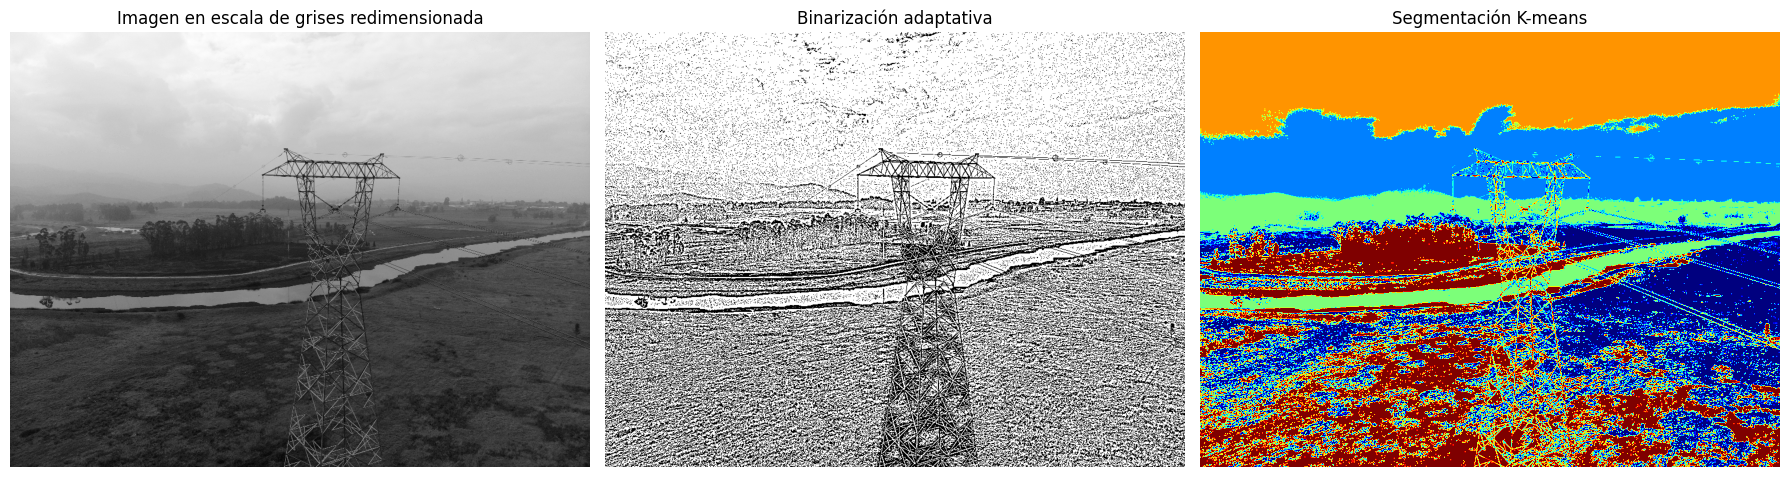

In [10]:
# Code for adaptive thresholding and K-means clustering

# Required libraries
import cv2
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "../data/DJI_0191.JPG"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image for processing
scale_factor = 0.25
image_resized = cv2.resize(image_rgb, (int(image_rgb.shape[1] * scale_factor), int(image_rgb.shape[0] * scale_factor)))

# Convert the resized image to grayscale
gray_resized = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)

# Apply adaptive thresholding
adapt_thresh = cv2.adaptiveThreshold(gray_resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Reshape the resized image to be a list of pixels
pixels_resized = image_resized.reshape(-1, 3)

# Apply K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pixels_resized)
pixel_labels_resized = kmeans.predict(pixels_resized)
segmented_image_resized = pixel_labels_resized.reshape(image_resized.shape[:2])

# Display the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(gray_resized, cmap='gray')
axs[0].axis('off')
axs[0].set_title("Imagen en escala de grises redimensionada")

axs[1].imshow(adapt_thresh, cmap='gray')
axs[1].axis('off')
axs[1].set_title("Binarización adaptativa")

axs[2].imshow(segmented_image_resized, cmap='jet')
axs[2].axis('off')
axs[2].set_title("Segmentación K-means")

plt.tight_layout()
plt.show()


Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [ 2.22222222e-01  1.23456790e-02  5.48692815e-03  2.19459545e-04
 -2.40822105e-07 -2.43843939e-05  4.76134016e-12]
Hu Moments for a contour: [ 2.50000000e-01  3.47222222e-02  3.92756726e-15  9.40693870e-15
  5.71723147e-29 -1.44424489e-15  8.54577451e-31]
Hu Moments for a contour: [0. 0. 0. 0. 0. 0. 0.]
Hu Moments for a contour: [0. 0.

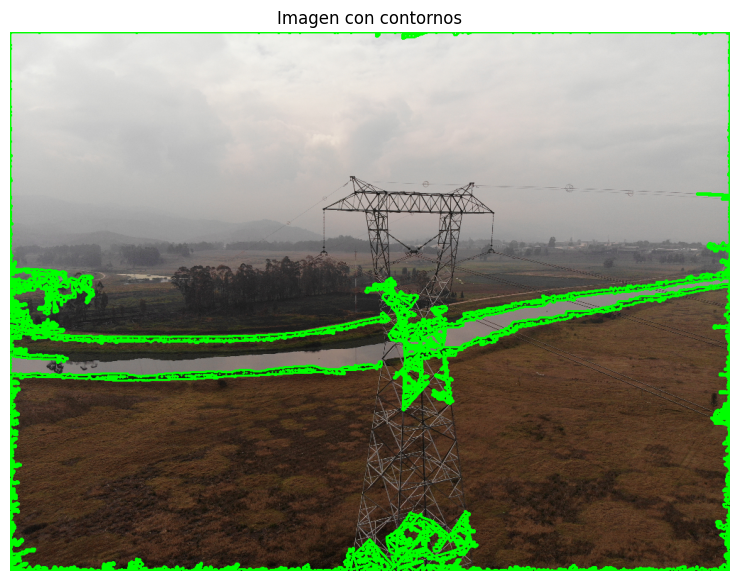

In [11]:
# Required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "../data/DJI_0191.JPG"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image for processing
scale_factor = 0.25
image_resized = cv2.resize(image_rgb, (int(image_rgb.shape[1] * scale_factor), int(image_rgb.shape[0] * scale_factor)))

# Convert the resized image to grayscale
gray_resized = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)

# Apply adaptive thresholding
adapt_thresh = cv2.adaptiveThreshold(gray_resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Find contours in the thresholded image
contours, _ = cv2.findContours(adapt_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate Hu Moments for each contour and visualize
image_with_contours = image_resized.copy()
for contour in contours:
    # Draw the contour
    cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 2)
    
    # Calculate Hu Moments
    moments = cv2.moments(contour)
    hu_moments = cv2.HuMoments(moments)
    
    # Print the Hu Moments for the contour (you can also save them for further processing)
    print("Hu Moments for a contour:", hu_moments.flatten())

# Display the image with contours
plt.figure(figsize=(10, 7))
plt.imshow(image_with_contours)
plt.axis('off')
plt.title("Imagen con contornos")
plt.show()
